# Project: On the Investigation and Analysis of The Movie Database (TMDb)  

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis (EDA)</a></li>
<li><a href="#conclusions">Conclusions/Findings</a></li>
    <li><a href="#Limitation">Limitations</a></li>
<li><a href="#Reference">Reference</a></li>
</ul>

<a id='intro'></a>
## Introduction

> The dataset that would be investigated in this project, is the collection of information containing 10,000 movies gotten from the movie database (TMDb).

> In this project, four major python libraries would be of great importance.
>
> 1. Numpy
> 2. Matplotlib
> 3. Pandas
> 4. Seaborn

# Project Questions

> In this project, I would be asking and answering some questions based on the TMDb dataset. I would plot some graphs to see the distribution and relationships of some properties. Below are the questions:

>1. What type of properties are associated with movies that have low revenues
>2.The most frequent move genre
>3. The most popular movies
>4. The rate of change of change of movie production
>5. Actor with higest appearance
>6. Relationships between profit made from the movies and the other key properties such as revenue and budgets
>7. Correlation across our dataset

In [60]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

import pandas as pd
import numpy as np
import matplotlib  as plt 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

>  In this section of the project, I will be loading the data, check to be sure the dataset is all clean and ready for analysis. 

### General Properties

In [61]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
mov_df=pd.read_csv('tmdb-movies.csv')
mov_df.head()

id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      http://www.jurassicworld.com/   Colin Trevorrow   
1                        http://www.madmaxmovie.com/     George Miller   
2     http://www.thedivergentseries.movie/#insurgent  Robert Schwentke   
3  http://www.starwars.com/films/star-wars-episod...       J.J. Abrams   
4                           http://www.furious7.com/         James Wan   

                         tagline  ...  \
0              The park is open.  ...   
1             What a Lovely Day.  ...   
2     One Choice Can Destroy You  ...   
3  Every generation has a story.  ...   
4            Vengeance Hits Home  ...   

                                            overview runtime  \
0  Twenty-two years after the events of Jurassic ...     124   
1  An apocalyptic story set in the furthest reach...     120   
2  Beatrice Prior must confront her inner demons ...     119   
3  Thirty years after defeating the Galactic Empi...     136   
4  Deckard Shaw seeks revenge against Dominic Tor...     137   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   
3   Action|Adventure|Science Fiction|Fantasy   
4                      Action|Crime|Thriller   

                                production_companies release_date vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15       5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15       6185   
2  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15       2480   
3          Lucasfilm|Truenorth Productions|Bad Robot     12/15/15       5292   
4  Universal Pictures|Original Film|Media Rights ...       4/1/15       2947   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  
2           6.3          2015  1.012000e+08  2.716190e+08  
3           7.5          2015  1.839999e+08  1.902723e+09  
4           7.3          2015  1.747999e+08  1.385749e+09  

[5 rows x 21 columns]

## Dataset Description
From the above query it is observed that the dataset has 21 columns.

In [62]:
mov_df.describe()  #This enable me to understand the statistical features of the dataset

id    popularity        budget       revenue       runtime  \
count   10866.000000  10866.000000  1.086600e+04  1.086600e+04  10866.000000   
mean    66064.177434      0.646441  1.462570e+07  3.982332e+07    102.070863   
std     92130.136561      1.000185  3.091321e+07  1.170035e+08     31.381405   
min         5.000000      0.000065  0.000000e+00  0.000000e+00      0.000000   
25%     10596.250000      0.207583  0.000000e+00  0.000000e+00     90.000000   
50%     20669.000000      0.383856  0.000000e+00  0.000000e+00     99.000000   
75%     75610.000000      0.713817  1.500000e+07  2.400000e+07    111.000000   
max    417859.000000     32.985763  4.250000e+08  2.781506e+09    900.000000   

         vote_count  vote_average  release_year    budget_adj   revenue_adj  
count  10866.000000  10866.000000  10866.000000  1.086600e+04  1.086600e+04  
mean     217.389748      5.974922   2001.322658  1.755104e+07  5.136436e+07  
std      575.619058      0.935142     12.812941  3.430616e+07  1.446325e+08  
min       10.000000      1.500000   1960.000000  0.000000e+00  0.000000e+00  
25%       17.000000      5.400000   1995.000000  0.000000e+00  0.000000e+00  
50%       38.000000      6.000000   2006.000000  0.000000e+00  0.000000e+00  
75%      145.750000      6.600000   2011.000000  2.085325e+07  3.369710e+07  
max     9767.000000      9.200000   2015.000000  4.250000e+08  2.827124e+09

In [63]:
mov_df.shape  # This help to check the shape of the dataset

(10866, 21)

In [4]:
mov_df.info()   #we use this to check for missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
sum(mov_df.duplicated())  # This goes to chech for duplicates

1

In [6]:
mov_df.drop_duplicates(inplace=True) # Attempts to drop dupliacte

In [7]:
sum(mov_df.duplicated())  # Confirms the duplicate has been removed

0

### Data Cleaning
 
> Now that I have loaded and understood the dataset, I will now go ahead and clean the data to ensure that it is fit for exploation and analysis.>

In [8]:
mov_df.drop(['id','imdb_id','homepage','tagline','keywords','overview','vote_count','vote_average'], axis = 1, inplace = True)
mov_df.info()  #This removes the columns that are not going to be used


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10865 non-null  float64
 1   budget                10865 non-null  int64  
 2   revenue               10865 non-null  int64  
 3   original_title        10865 non-null  object 
 4   cast                  10789 non-null  object 
 5   director              10821 non-null  object 
 6   runtime               10865 non-null  int64  
 7   genres                10842 non-null  object 
 8   production_companies  9835 non-null   object 
 9   release_date          10865 non-null  object 
 10  release_year          10865 non-null  int64  
 11  budget_adj            10865 non-null  float64
 12  revenue_adj           10865 non-null  float64
dtypes: float64(3), int64(4), object(6)
memory usage: 1.2+ MB


In [9]:
mov_df.drop_duplicates(inplace=True) # Attempts to drop dupliacte

In [20]:
sum(mov_df.duplicated())  # Confirms the duplicate has been removed

0

In [10]:
mov_df.isnull().sum()    #This allows us to count missing values for each column

popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [26]:
mov_df.dropna(inplace=True)    #This drops rows with null values

In [27]:
mov_df.isnull().sum().any()     # To confirm the dropped missing values

False

In [30]:
mov_df.shape

(9772, 13)

In [11]:
#We then proceed to replace all the row with zero in budget and revenue columns
new_list =['budget', 'revenue']  #This create a new list for revenue and budget

mov_df[new_list]=mov_df[new_list].replace(0,np.NAN)

mov_df.dropna(subset = new_list, inplace = True)

In [34]:
mov_df.shape

(3805, 13)

In [35]:
mov_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3805 entries, 0 to 10848
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            3805 non-null   float64
 1   budget                3805 non-null   float64
 2   revenue               3805 non-null   float64
 3   original_title        3805 non-null   object 
 4   cast                  3805 non-null   object 
 5   director              3805 non-null   object 
 6   runtime               3805 non-null   int64  
 7   genres                3805 non-null   object 
 8   production_companies  3805 non-null   object 
 9   release_date          3805 non-null   object 
 10  release_year          3805 non-null   int64  
 11  budget_adj            3805 non-null   float64
 12  revenue_adj           3805 non-null   float64
dtypes: float64(5), int64(2), object(6)
memory usage: 416.2+ KB


## Date conversion

In [14]:
mov_df.release_date = pd.to_datetime(mov_df['release_date'])

In [13]:
mov_df.head()

popularity       budget       revenue                original_title  \
0   32.985763  150000000.0  1.513529e+09                Jurassic World   
1   28.419936  150000000.0  3.784364e+08            Mad Max: Fury Road   
2   13.112507  110000000.0  2.952382e+08                     Insurgent   
3   11.173104  200000000.0  2.068178e+09  Star Wars: The Force Awakens   
4    9.335014  190000000.0  1.506249e+09                     Furious 7   

                                                cast          director  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   Colin Trevorrow   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...     George Miller   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...  Robert Schwentke   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...       J.J. Abrams   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...         James Wan   

   runtime                                     genres  \
0      124  Action|Adventure|Science Fiction|Thriller   
1      120  Action|Adventure|Science Fiction|Thriller   
2      119         Adventure|Science Fiction|Thriller   
3      136   Action|Adventure|Science Fiction|Fantasy   
4      137                      Action|Crime|Thriller   

                                production_companies release_date  \
0  Universal Studios|Amblin Entertainment|Legenda...   2015-06-09   
1  Village Roadshow Pictures|Kennedy Miller Produ...   2015-05-13   
2  Summit Entertainment|Mandeville Films|Red Wago...   2015-03-18   
3          Lucasfilm|Truenorth Productions|Bad Robot   2015-12-15   
4  Universal Pictures|Original Film|Media Rights ...   2015-04-01   

   release_year    budget_adj   revenue_adj  
0          2015  1.379999e+08  1.392446e+09  
1          2015  1.379999e+08  3.481613e+08  
2          2015  1.012000e+08  2.716190e+08  
3          2015  1.839999e+08  1.902723e+09  
4          2015  1.747999e+08  1.385749e+09

In [15]:
mov_df.dtypes

popularity                     float64
budget                         float64
revenue                        float64
original_title                  object
cast                            object
director                        object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
release_year                     int64
budget_adj                     float64
revenue_adj                    float64
dtype: object

<a id='eda'></a>
## Exploratory Data Analysis



### Project Question 1 (What type of properties are associated with movies that have low revenues)

In [48]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.

sorted_revenue_lowest =mov_df.sort_values(by=['revenue'], ascending=False).head(200)

sorted_revenue_lowest.tail() #This sort revenue from Highest to lowest and diplays the last five rows

popularity       budget      revenue  \
5588    0.734349  120000000.0  415440673.0   
3017    0.620489   65000000.0  415252786.0   
1966    1.385499   15000000.0  414211549.0   
1414    1.752134  150000000.0  413106170.0   
9182    2.640852   35000000.0  411348924.0   

                                      original_title  \
5588                                   The Wolverine   
3017                                Sex and the City   
1966                               The King's Speech   
1414  Night at the Museum: Battle of the Smithsonian   
9182                                          Batman   

                                                   cast              director  \
5588  Hugh Jackman|Tao Okamoto|Rila Fukushima|Hiroyu...         James Mangold   
3017  Sarah Jessica Parker|Kim Cattrall|Cynthia Nixo...  Michael Patrick King   
1966  Colin Firth|Geoffrey Rush|Helena Bonham Carter...            Tom Hooper   
1414  Ben Stiller|Amy Adams|Owen Wilson|Hank Azaria|...            Shawn Levy   
9182  Jack Nicholson|Michael Keaton|Kim Basinger|Mic...            Tim Burton   

      runtime                                    genres  \
5588      126  Action|Science Fiction|Adventure|Fantasy   
3017      145                      Comedy|Drama|Romance   
1966      118                             Drama|History   
1414      105    Adventure|Fantasy|Action|Comedy|Family   
9182      126                            Fantasy|Action   

                                   production_companies release_date  \
5588  Twentieth Century Fox Film Corporation|Donners...   2013-07-23   
3017  New Line Cinema|Darren Star Productions|Home B...   2008-05-12   
1966  The Weinstein Company|UK Film Council|Bedlam P...   2010-09-06   
1414  Twentieth Century Fox Film Corporation|1492 Pi...   2009-05-20   
9182  PolyGram Filmed Entertainment|The Guber-Peters...   1989-06-23   

      release_year    budget_adj   revenue_adj  
5588          2013  1.123240e+08  3.888663e+08  
3017          2008  6.583113e+07  4.205625e+08  
1966          2010  1.500000e+07  4.142115e+08  
1414          2009  1.524601e+08  4.198813e+08  
9182          1989  6.156447e+07  7.235566e+08

In [64]:
# Create a histogram of the mov_df DataFrame
mov_df.hist(figsize=(8, 10), bins=10)

# Set the title and axis labels for the plot
plt.title('Histogram of Movie Dataset', fontsize=14)
plt.xlabel('Column Values', fontsize=12)  # Updated x-axis label
plt.ylabel('Frequency', fontsize=12)

# Display the plot
plt.show()


In [65]:
# calculate the skewness of each variable
skewness = mov_df.skew()

# print the skewness of each variable
print(skewness)


id              1.732294
popularity      9.876331
budget          3.717237
revenue         6.658397
runtime         6.103793
vote_count      6.177306
vote_average   -0.435908
release_year   -1.204254
budget_adj      3.114920
revenue_adj     6.251202
dtype: float64


C:\Users\Owner\AppData\Local\Temp\ipykernel_7476\470751015.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  skewness = mov_df.skew()


In the above, vote_average and release_year are skewed to the left while other columns are skewed to the right.

### Project Question 2 (The most frequent movie genre)

In [66]:
def get_function(column_name, mov_df):   #Takes the two parameter (column_name and dataset)
   
    # check if column_name is in mov_df.columns
    if column_name not in mov_df.columns:
        raise ValueError(f"{column_name} is not a valid column name in the provided dataframe.")
    
    # split the column values by '|' and count the frequency of each value
    freq_counts = mov_df[column_name].str.split('|', expand=True).stack().value_counts()
    
    # return the frequency counts as a pandas Series object
    return freq_counts

In [67]:
# Gets the get_function
Top_Genres = get_function('genres', mov_df)
print(Top_Genres)

Drama              4761
Comedy             3793
Thriller           2908
Action             2385
Romance            1712
Horror             1637
Adventure          1471
Crime              1355
Family             1231
Science Fiction    1230
Fantasy             916
Mystery             810
Animation           699
Documentary         520
Music               408
History             334
War                 270
Foreign             188
TV Movie            167
Western             165
dtype: int64


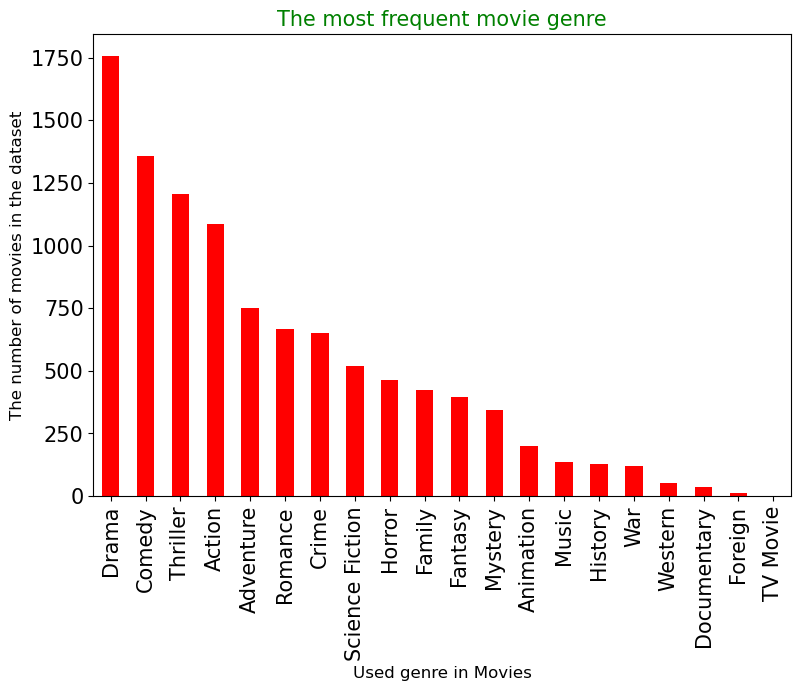

In [68]:
# plot the frequency counts as a bar plot
gen_bar = freq_counts.plot.bar(color='red', fontsize=15)

# set the size of the plot
gen_bar.figure.set_size_inches(9, 6)

# set the title and axis labels
plt.title('The most frequent movie genre', color ='green', fontsize=15)
plt.xlabel('Used genre in Movies', color='black', fontsize=12)
plt.ylabel('The number of movies in the dataset', color='black', fontsize=12)

# display the plot
plt.show()

# From the above graph  we can see that **Drama** top the list as the top movie

### Project Question 3  (The most popualar movies)

In [69]:
# Group the mov_df DataFrame by original_title and sum the popularity column for each group
mov_df_popularity = mov_df.groupby('original_title')['popularity'].sum()

# Select the top 30 movies with the largest popularity score and store the result in top20_mp
top30_mp = mov_df_popularity.nlargest(30)

# Print the top20_mp Series object to the console
print(top30_mp)


original_title
Jurassic World                                       32.985763
Mad Max: Fury Road                                   28.419936
Interstellar                                         24.949134
Guardians of the Galaxy                              14.311205
Insurgent                                            13.112507
Captain America: The Winter Soldier                  12.971027
Star Wars                                            12.037933
John Wick                                            11.422751
Star Wars: The Force Awakens                         11.173104
The Hunger Games: Mockingjay - Part 1                10.739009
The Hobbit: The Battle of the Five Armies            10.174599
Avatar                                                9.432768
The Revenant                                          9.421300
Inception                                             9.363643
Furious 7                                             9.335014
Fight Club                              

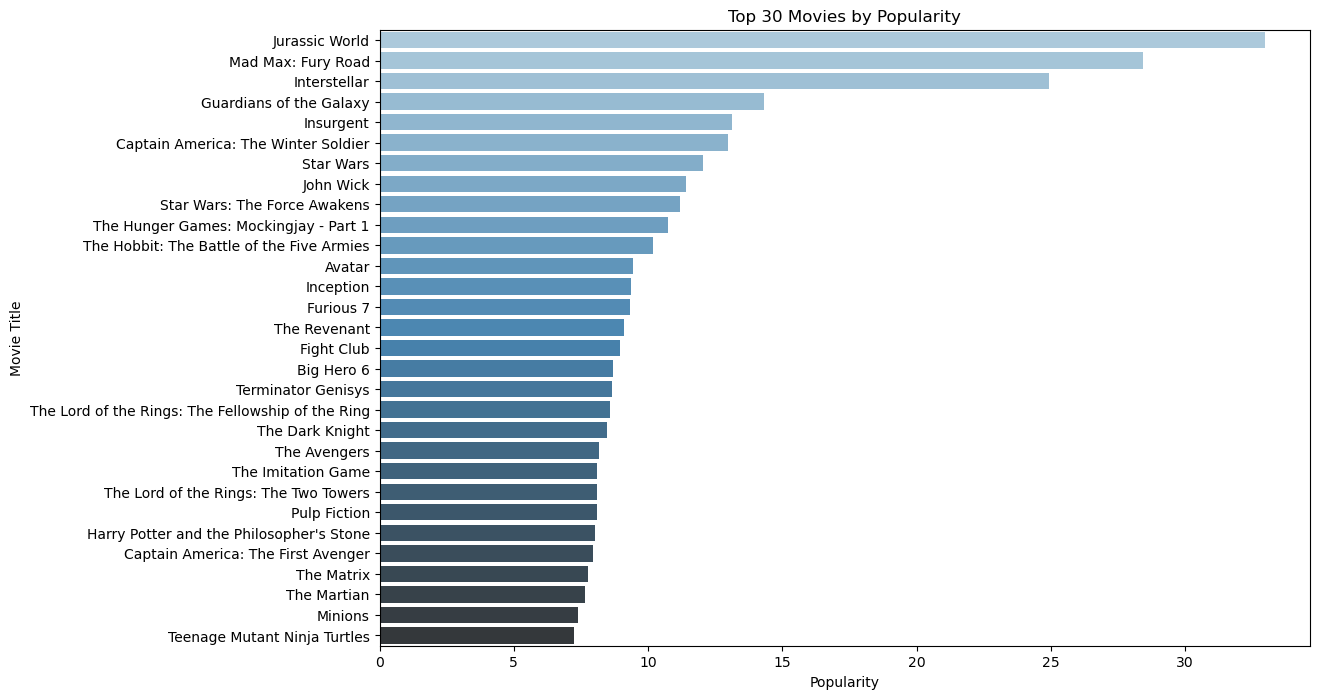

In [40]:
# This executes the code to get the top 30 movies by popularity
mov_df_popularity = mov_df.groupby('original_title')['popularity'].sum()
top30_mp = mov_df_popularity.nlargest(30)

# create a bar plot of the top 30 movies
plt.figure(figsize=(12, 8))
sns.barplot(x=top30_mp.values, y=top30_mp.index, palette="Blues_d")
plt.xlabel('Popularity')
plt.ylabel('Movie Title')
plt.title('Top 30 Movies by Popularity')
plt.show()


 From the above result: **Jurassic World** got the highest puplarity making it the most popular movie in our dataset

### Project Question 4  (The rate of change  in movie production)

In [71]:
# Create a list of unique years in the 'release_year' column of the DataFrame
years =mov_df['release_year'].unique()
# Create an empty list to store the year and count of movies produced in each year
py = []
# Iterate over each year and count the number of movies produced in that year
for year in years:
    year_mov_df = mov_df[mov_df['release_year']==year] 
    count = len(year_mov_df.index) 
    
    py.append((year, count))
    
py_df = pd.DataFrame(py, columns=['Year','Number of movies produced']).sort_values('Year').reset_index().drop(['index'], axis=1)
py_df

Year  Number of movies produced
0   1960                         32
1   1961                         31
2   1962                         32
3   1963                         34
4   1964                         42
5   1965                         35
6   1966                         46
7   1967                         40
8   1968                         39
9   1969                         31
10  1970                         41
11  1971                         55
12  1972                         40
13  1973                         55
14  1974                         47
15  1975                         44
16  1976                         47
17  1977                         57
18  1978                         65
19  1979                         57
20  1980                         78
21  1981                         82
22  1982                         81
23  1983                         80
24  1984                        105
25  1985                        109
26  1986                        121
27  1987                        125
28  1988                        145
29  1989                        137
30  1990                        132
31  1991                        133
32  1992                        133
33  1993                        178
34  1994                        184
35  1995                        175
36  1996                        204
37  1997                        192
38  1998                        210
39  1999                        224
40  2000                        227
41  2001                        242
42  2002                        266
43  2003                        281
44  2004                        307
45  2005                        364
46  2006                        408
47  2007                        438
48  2008                        496
49  2009                        533
50  2010                        490
51  2011                        540
52  2012                        588
53  2013                        659
54  2014                        700
55  2015                        629

In [45]:
# create a bar chart of the number of movies produced per year
py_df.plot(x='Year', y='Number of movies produced', kind='bar', color=['red', 'green', 'blue', 'purple', 'orange'], figsize=(22, 12))

# set the x and y axis labels
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Movies Produced', fontsize=12)

# set the title of the chart
plt.title('Number of Movies Produced per Year', color='black', fontsize=15)

# display the chart
plt.show()

 We can also visualise this using the line chart

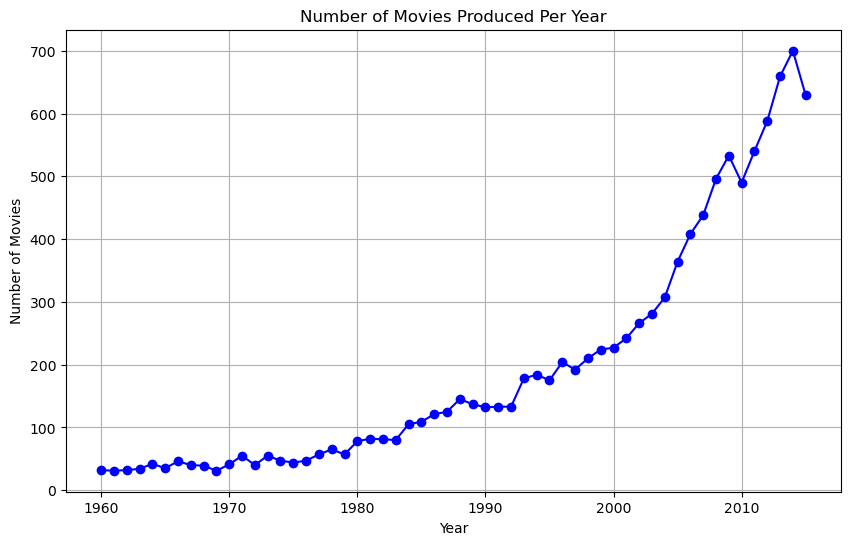

In [72]:
# set the figure size
plt.figure(figsize=(10, 6))

# create the line chart
plt.plot(py_df['Year'], py_df['Number of movies produced'], marker='o', color='blue')

# set the title and axis labels
plt.title('Number of Movies Produced Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')

# add a grid to the chart
plt.grid()

# display the chart
plt.show()

   >From the above analysis it can be deduced, that there is a yearly increase movie  production. Also, the result shows that   2014 **(700)**
  >has the highest number of produced movies, also the line graph also shows that the year 1961 and 1969  both have **(31)** meaning that they have the lowest produced movie year.

### Project Question 5  (Actor with highest appearance)

In [75]:
# Use the function defined to count the actor with highest cast
cast = get_function('cast', mov_df)  
#Display the top cast
cast.head()          

Robert De Niro       72
Samuel L. Jackson    71
Bruce Willis         62
Nicolas Cage         61
Michael Caine        53
dtype: int64

 > It is very clear here that **Robert De Niro** appeared mostly in the movie by featuring 72 times.

# Lets visualise the top casts using a bar chat

In [76]:
top_cast= cast.head()

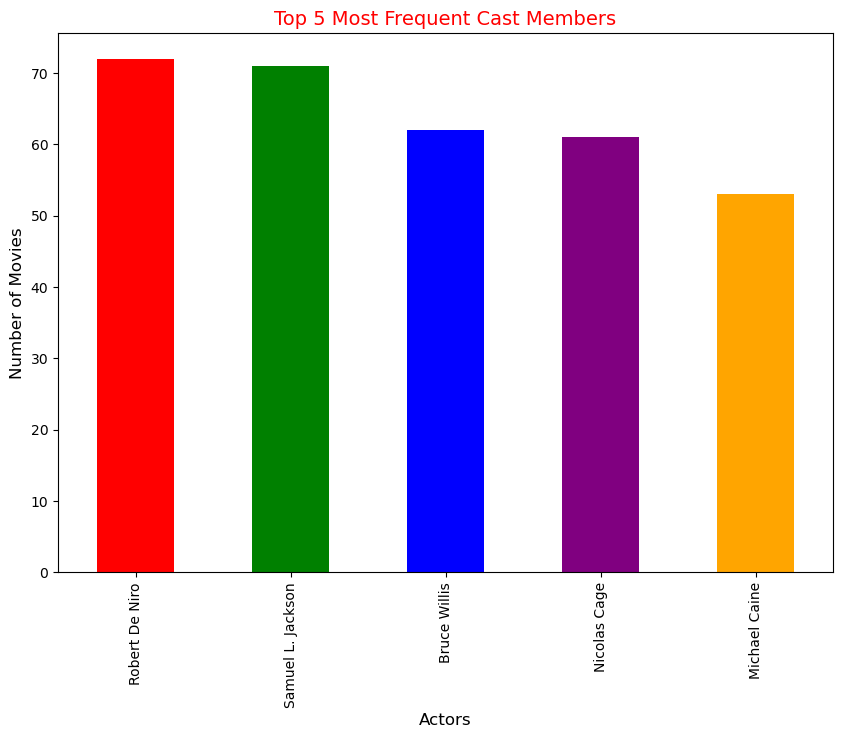

In [77]:
top_cast_bar = top_cast.plot.bar(color=['red', 'green', 'blue', 'purple', 'orange'], fontsize=10)

top_cast_bar.figure.set_size_inches(10, 7)

plt.title('Top 5 Most Frequent Cast Members', color='red', fontsize=14)
plt.xlabel('Actors', color='black', fontsize=12)
plt.ylabel('Number of Movies', color='black', fontsize=12)
plt.show()


> This can also be seen using the bar chart that **Robert De Niro** was the highest featured actor inthe movie

### Project Question 6  (Relationships between profit made from the movies and other key properties such as revenue and budget)

In [78]:
Rev_Budg = mov_df[['revenue', 'budget']]  # This selects revenue and budget columns

In [79]:
Rev_Budg.head()   # Displays revenue and budget columns

revenue     budget
0  1513528810  150000000
1   378436354  150000000
2   295238201  110000000
3  2068178225  200000000
4  1506249360  190000000

In [55]:
mov_df['mov_df_profit']=mov_df['revenue'] - mov_df['budget']  #profit= revenue - budget 
mov_df['mov_df_profit'].head()

0    1.363529e+09
1    2.284364e+08
2    1.852382e+08
3    1.868178e+09
4    1.316249e+09
Name: mov_df_profit, dtype: float64

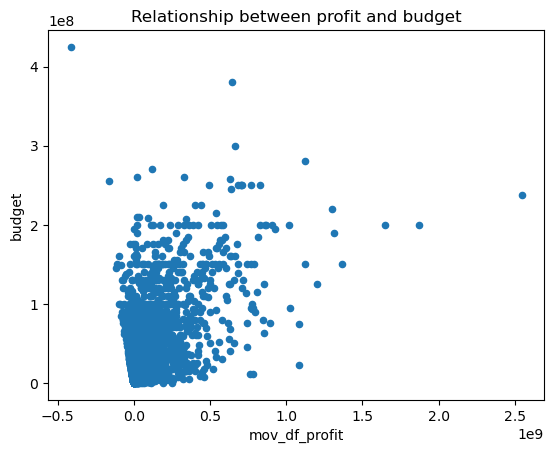

In [56]:
#scatter plot showing the relationship between profit and budget
mov_df.plot(x='mov_df_profit', y= 'budget', kind = 'scatter', title = 'Relationship between profit and budget');

In [57]:
#Checks for correlation 
mov_df['mov_df_profit'].corr(mov_df['budget'])

0.5268176539924018

From the graph and correlation result obtained, it can be deduced that both variables responds to each other but not strongly,
hence there is a weak correlation between profit and the budget.


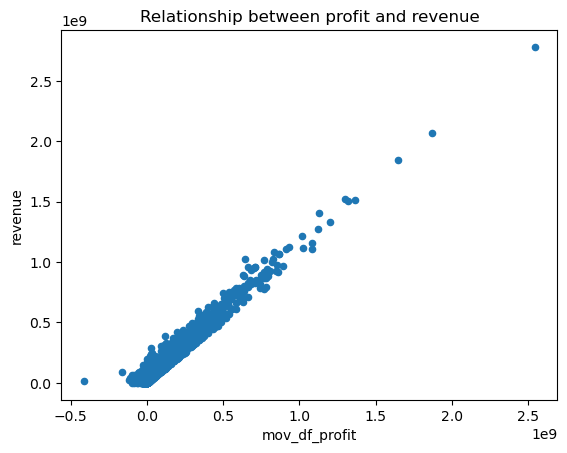

In [58]:
#scatter plot showing the relationship between profit and revnue
mov_df.plot(x='mov_df_profit', y= 'revenue', kind = 'scatter', title = 'Relationship between profit and revenue');

In [59]:
#Checks for correlation 
mov_df['mov_df_profit'].corr(mov_df['revenue'])

0.9791333955736253

The above graph and corellation quefficient result obtained shows a **strong correlation** (connection) between profit and revenue from the movie. We can see the straight line that indicates the positive responnse between the two variables. Also, this shows that when profit increases revenue would increase as well.

### Project Question 7  (Correlation across our dataset)

In [162]:
mov_df.corr() # Calculate the correlations across all the columns

id  popularity    budget   revenue   runtime  vote_count  \
id             1.000000   -0.014350 -0.141351 -0.099227 -0.088360   -0.035551   
popularity    -0.014350    1.000000  0.545472  0.663358  0.139033    0.800828   
budget        -0.141351    0.545472  1.000000  0.734901  0.191283    0.632702   
revenue       -0.099227    0.663358  0.734901  1.000000  0.162838    0.791175   
runtime       -0.088360    0.139033  0.191283  0.162838  1.000000    0.163278   
vote_count    -0.035551    0.800828  0.632702  0.791175  0.163278    1.000000   
vote_average  -0.058363    0.209511  0.081014  0.172564  0.156835    0.253823   
release_year   0.511364    0.089801  0.115931  0.057048 -0.117204    0.107948   
budget_adj    -0.189015    0.513550  0.968963  0.706427  0.221114    0.587051   
revenue_adj   -0.138477    0.609083  0.622505  0.919110  0.175676    0.707942   
mov_df_profit -0.074960    0.628991  0.570182  0.976160  0.136036    0.755905   

               vote_average  release_year  budget_adj  revenue_adj  \
id                -0.058363      0.511364   -0.189015    -0.138477   
popularity         0.209511      0.089801    0.513550     0.609083   
budget             0.081014      0.115931    0.968963     0.622505   
revenue            0.172564      0.057048    0.706427     0.919110   
runtime            0.156835     -0.117204    0.221114     0.175676   
vote_count         0.253823      0.107948    0.587051     0.707942   
vote_average       1.000000     -0.117632    0.093039     0.193085   
release_year      -0.117632      1.000000    0.016793    -0.066256   
budget_adj         0.093039      0.016793    1.000000     0.646607   
revenue_adj        0.193085     -0.066256    0.646607     1.000000   
mov_df_profit      0.183109      0.032002    0.545624     0.914145   

               mov_df_profit  
id                 -0.074960  
popularity          0.628991  
budget              0.570182  
revenue             0.976160  
runtime             0.136036  
vote_count          0.755905  
vote_average        0.183109  
release_year        0.032002  
budget_adj          0.545624  
revenue_adj         0.914145  
mov_df_profit       1.000000

In [163]:
sns.pairplot(data=mov_df) # scatter plot and histogram

From the correlation coefficient results gotten above and the pair plot, there is a strong correlation between budge and revenue. Also, popularity and revenue

<a id='conclusions'></a>
## Conclusions

> Investigating and Anslysing this dataset has been a fantastic journey. Some observation were made and listed below:

> 1. Year 1989 had the lowest revenue.
> 2. Drama came out to be the most popluar genre followed by comedy. 
> 3. Jurassic World got the highest puplarity making it the most watched movie
> 4. The dataset shows that there is yearly increase in the productio of movie. It was gathered that 2014 has the highest movies      produced while 1961 and 1969 with the lowest movie produced.There could be reasons for this. Would leave that as further research.
> 5. **Robert De Niro** made the top list of actors with most cast.
> 6. I look at correlation between profit and budget which indicates weak correlation. However, there was a strong connection     between profit and revenue. That is, the higher the revenue generated the higher the profit. 
> 7. There is a strong correlation between reveue and budget

# Limitations


> From the dataset revenue and budget column lack currencies which was difficult to determine the currency for each movie with their geographical locations.

> I had to delete some columns because of missing values. That would have also contributed to my analysis by helping me to answer more qestions in a robust way.

>  Country of movie production could have been added as well. This would help to see the countries with highest movie production.


 # Reference

> 1. https://learn.udacity.com/nanodegrees/nd002/parts/cd0000/lessons/ls0523/concepts/83bac7b3-02eb-442b-82f5-ea1bd185aaff
> 2. https://learn.udacity.com/nanodegrees/nd002/parts/cd0000/lessons/ls0524/concepts/7b29eacd-587d-4d32-9302-c89c1a590ac4
> 3. Practical Data Science with Python by N. George